# Comparing two PyWGCNAs

## Read two PyWGCNA objects

In [2]:
import PyWGCNA
pyWGCNA_5xFAD = PyWGCNA.readWGCNA("5xFAD.p")
pyWGCNA_3xTgAD = PyWGCNA.readWGCNA("3xTgAD_paper/3xTgAD.p")

Reading WGCNA done!
Reading WGCNA done!


In [3]:
#from utils import *
modelAD_5xFAD_5xFAD = PyWGCNA.compareWGCNA(pyWGCNA_5xFAD, pyWGCNA_3xTgAD)

TypeError: 'dict_keys' object is not subscriptable

## Construction of the gene network and identification of modules

PyWGCNA compress all the steps of network construction and module detection in one function called `findModules` including:
1. Choosing the soft-thresholding power: analysis of network topology
2. Co-expression similarity and adjacency
3. Topological Overlap Matrix (TOM)
4. Clustering using TOM
5. Merging of modules whose expression profiles are very similar

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  1876
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.368857 -0.481613       0.701585  2444.750756  2260.416614   
1       2    0.7253  -0.99165       0.886361   840.665489   673.081241   
2       3  0.791986 -1.194264       0.946969   385.685335   258.451265   
3       4  0.835392   -1.3419       0.968446   207.404152   113.456087   
4       5  0.853842 -1.472183       0.973346   123.232581    54.784481   
5       6  0.870673 -1.553348       0.979584    78.455923     28.47124   
6       7  0.886736 -1.600869       0.986635    52.572016    15.594822   
7       8  0.896672 -1.639343       0.992373     36.65884     9.454046   
8       9  0.903531 -1.677747       0.994643    26.397061     6.024431   
9      10  0.906045 -1.706474       0.995895    19.521431     3.975959   
10     11  0.905582 -1.731076       0.994806    14.767291     2.623921   
11     13

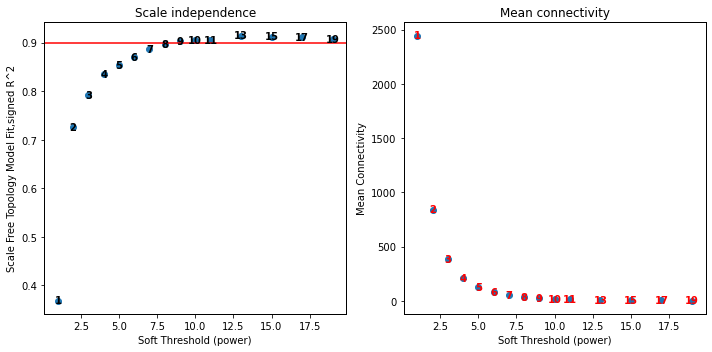

In [3]:
pyWGCNA_5xFAD.findModules()

We also can merge two previous steps by calling `runWGCNA()` function.

## Relating modules to external information and identifying important genes
PyWGCNA gather some important analysis after identifying modules in `analyseWGCNA()` function including:

1. Quantifying module–trait relationship 
2. Gene relationship to trait and modules

keep in your mind before start analysing don't forget to add any information you have about samples or genes.

For showing module relationship heatmap, PyWGCNA needs user to indicate color from [Matplotlib colors](https://matplotlib.org/stable/gallery/color/named_colors.html) for metadata by using `setMetadataColor()` function.

You also can select which data Trait in which order you wish to show in module eigen gene heatmap

In [13]:
pyWGCNA_5xFAD.addSampleInfo(path='5xFAD_paper/metaData', 
                            sep='\t')
# add color for metadata
pyWGCNA_5xFAD.setMetadataColor('Sex', {'Female': 'green',
                                       'Male': 'yellow'})
pyWGCNA_5xFAD.setMetadataColor('Genotype', {'5xFADWT': 'darkviolet',
                                            '5xFADHEMI': 'deeppink'})
pyWGCNA_5xFAD.setMetadataColor('Age', {'4mon': 'thistle',
                                       '8mon': 'plum',
                                       '12mon': 'violet',
                                       '18mon': 'purple'})
pyWGCNA_5xFAD.setMetadataColor('Tissue', {'Hippocampus': 'red',
                                          'Cortex': 'blue'})

geneList = PyWGCNA.getGeneList(dataset='mmusculus_gene_ensembl',
                               attributes=['ensembl_transcript_id', 
                                           'mgi_symbol', 
                                           'ensembl_gene_id', 
                                           'ensembl_peptide_id'])


pyWGCNA_5xFAD = pyWGCNA_5xFAD.analyseWGCNA(geneList=geneList)

Analysing WGCNA...
calculating module trait relationship ...
	Done..

Adding genes for each modules ...
	Done..

plotting module heatmap eigengene...
	Done..

plotting Go term for each module...
Xhecking requirements for saving Go Term
Go_term directory does not exist!
Creating Go_term directory!
Xhecking requirements for saving Go Term
Xhecking requirements for saving Go Term
Xhecking requirements for saving Go Term
Xhecking requirements for saving Go Term
Xhecking requirements for saving Go Term
Xhecking requirements for saving Go Term
Xhecking requirements for saving Go Term


2022-02-28 22:35:06,949 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.5


Xhecking requirements for saving Go Term


2022-02-28 22:35:33,468 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.5


Xhecking requirements for saving Go Term
Xhecking requirements for saving Go Term
Xhecking requirements for saving Go Term
Xhecking requirements for saving Go Term
Xhecking requirements for saving Go Term
Xhecking requirements for saving Go Term
Xhecking requirements for saving Go Term
Xhecking requirements for saving Go Term
Xhecking requirements for saving Go Term
Xhecking requirements for saving Go Term
Xhecking requirements for saving Go Term
Xhecking requirements for saving Go Term
Xhecking requirements for saving Go Term
	Done..



## Saving and loading your PyWGCNA
you can save or load your PyWGCNA object with `saveWGCNA()` or `readWGCNA()` function.

In [14]:
pyWGCNA_5xFAD.saveWGCNA()

Saving WGCNA as 5xFAD.p


you can also load your PyWGCNA object with `readWGCNA()` function.

In [31]:
pyWGCNA_5xFAD = PyWGCNA.readWGCNA("5xFAD.p")

Reading WGCNA done!
